# Axion-electron coupling limits vs axion mass

Axion mass-PQ scale relation:
\begin{equation}
m_{a}=5.70(7) \mu \mathrm{eV}\left(\frac{10^{12} \,\mathrm{GeV}}{f_{a}}\right)
\end{equation}

Axion-electron coupling
\begin{equation}
g_{ae} \equiv \frac{C_{ae} m_{e}}{f_{a}}=8.943 \times 10^{-11} C_{ae}\frac{m_a}{\mathrm{eV}}
\end{equation}

Model dependent constant:
\begin{equation}
C_{ae}  = 
\begin{cases}
  2\times 10^{-4} & {\rm KSVZ} \\
  [0.024,\frac{1}{3}] & {\rm DFSZ\,I} \\
  [-\frac{1}{3},0] & {\rm DFSZ\,II}
\end{cases}
\end{equation}
In DFSZ the lepton mass can come from either coupling to $H_u$ or $H_d$, so $C_{ae} = -C_{au}$ or $C_{ad}$. The range of values for DFSZ I and II come from the perturbativity of the Yukawa couplings with sets the range $0.28<v_{u} / v_{d}<140$ for the Higgs vevs.

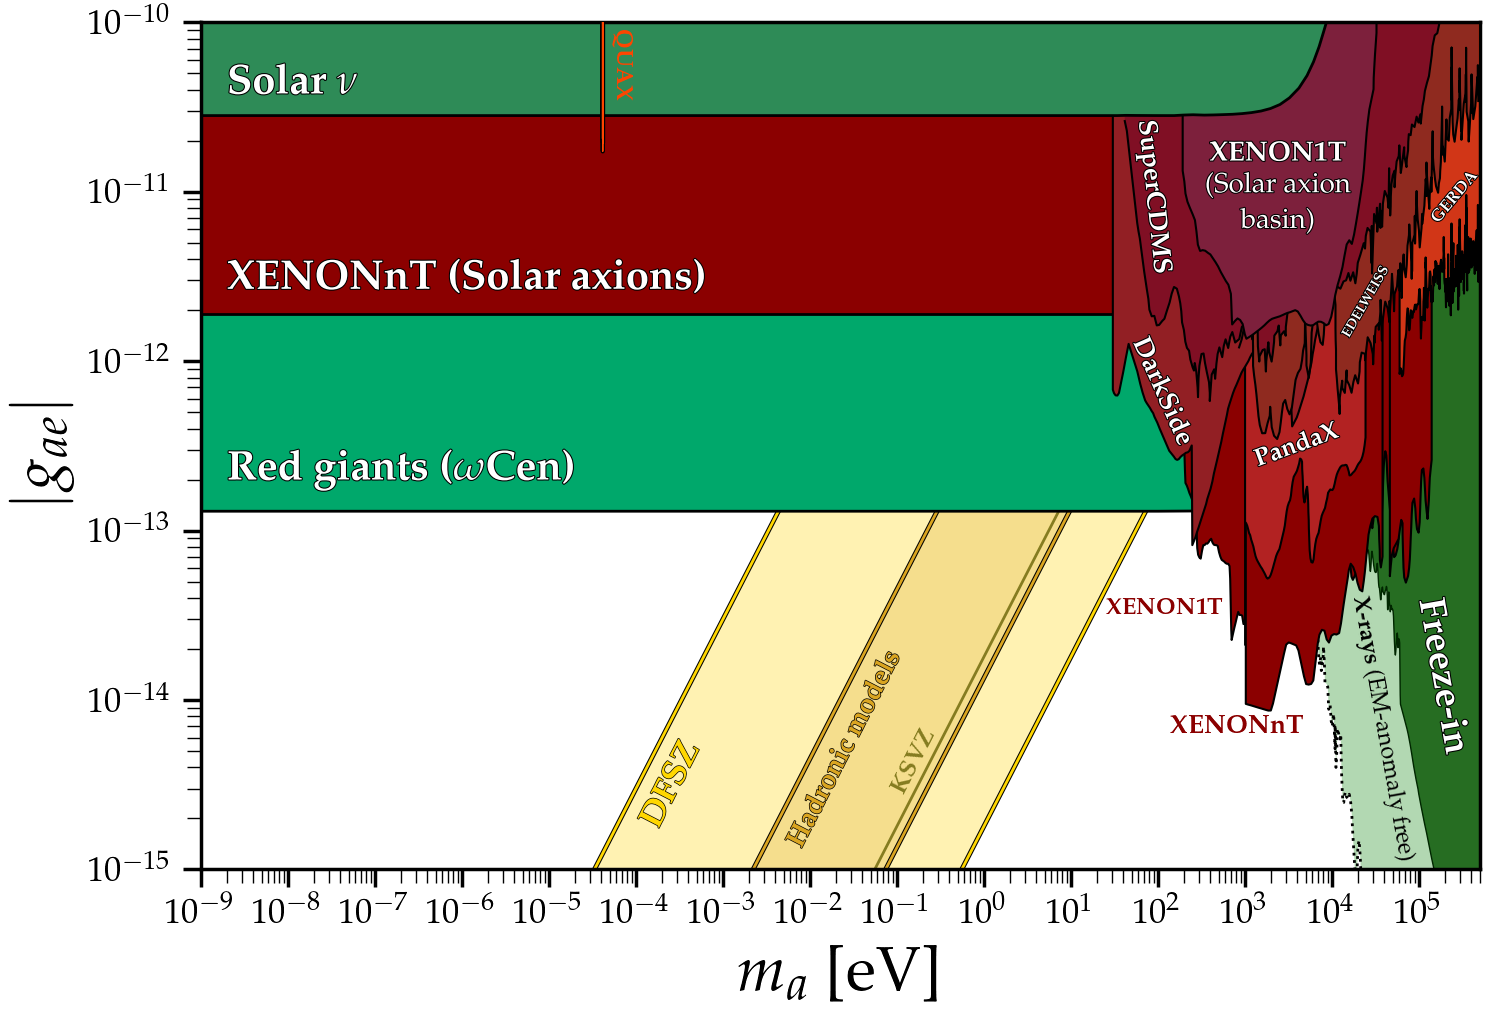

In [1]:
%matplotlib inline
from numpy import loadtxt
import matplotlib.pyplot as plt
from PlotFuncs import FigSetup,BlackHoleSpins,AxionElectron, MySaveFig,FilledLimit,line_background

fig,ax = FigSetup(Shape='Rectangular',ylab=r'$|g_{ae}|$',mathpazo=True,\
                  g_min=1e-15,g_max=1e-10,m_min=1e-9,m_max=5e5,xtick_rotation=0)

AxionElectron.QCDAxion(ax)
AxionElectron.PandaX(ax)
AxionElectron.XENON1T(ax,fs=17)
AxionElectron.XENONnT(ax)
AxionElectron.XENONnT_Solar(ax)
AxionElectron.SolarBasin(ax)
AxionElectron.SuperCDMS(ax)
AxionElectron.DarkSide(ax)
AxionElectron.EDELWEISS(ax)
AxionElectron.RedGiants(ax)
AxionElectron.SolarNu(ax)
AxionElectron.QUAX(ax)
AxionElectron.Xrays(ax)
AxionElectron.IrreducibleFreezeIn(ax,rotation=-80,fs=27,text_pos=[4.2e5,5e-15])
AxionElectron.GERDA(ax,text_pos=[1.3e5, 1.38e-11],fs=12,rotation=50)


MySaveFig(fig,'AxionElectron')

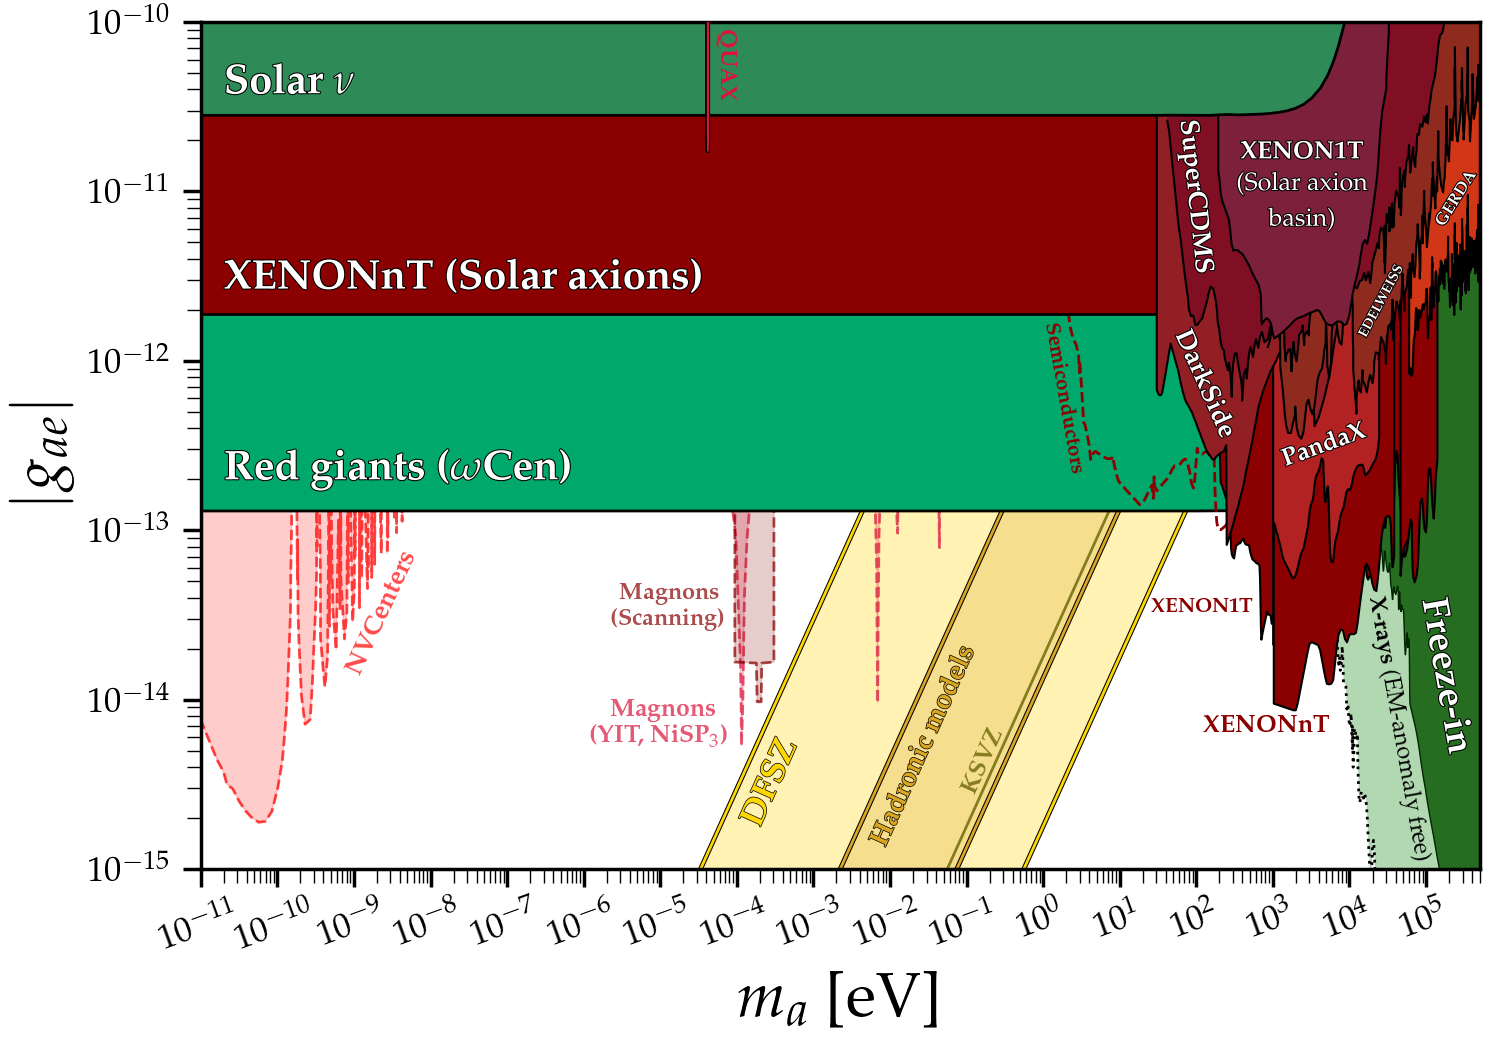

In [2]:
fig,ax = FigSetup(Shape='Rectangular',ylab=r'$|g_{ae}|$',mathpazo=True,\
                  g_min=1e-15,g_max=1e-10,m_min=1e-11,m_max=5e5,xtick_rotation=20)

AxionElectron.QCDAxion(ax)
AxionElectron.XENONnT_Solar(ax,text_shift=[0.01,1])
AxionElectron.PandaX(ax)
AxionElectron.XENON1T(ax,fs=15)
AxionElectron.XENONnT(ax,fs=18)
AxionElectron.SolarBasin(ax,fs=18)
AxionElectron.SuperCDMS(ax)
AxionElectron.DarkSide(ax,text_pos=[4.3e1,1.6e-12])
AxionElectron.EDELWEISS(ax,rotation=62)
AxionElectron.RedGiants(ax,text_pos=[0.2e-10,2e-13])
AxionElectron.SolarNu(ax,text_pos=[0.2e-10,3.8e-11])
AxionElectron.QUAX(ax)
#AxionElectron.LZ(ax)
AxionElectron.Semiconductors(ax)       
AxionElectron.Magnon(ax,zorder=0.1)
AxionElectron.MagnonScan(ax,zorder=0.1)
AxionElectron.NVCenters(ax)
AxionElectron.Xrays(ax,rotation=-80)
AxionElectron.IrreducibleFreezeIn(ax,rotation=-80,fs=27,text_pos=[4.5e5,5e-15])
AxionElectron.GERDA(ax,text_pos=[1.24e5, 1.38e-11],fs=12,rotation=58)



MySaveFig(fig,'AxionElectron_with_Projections')

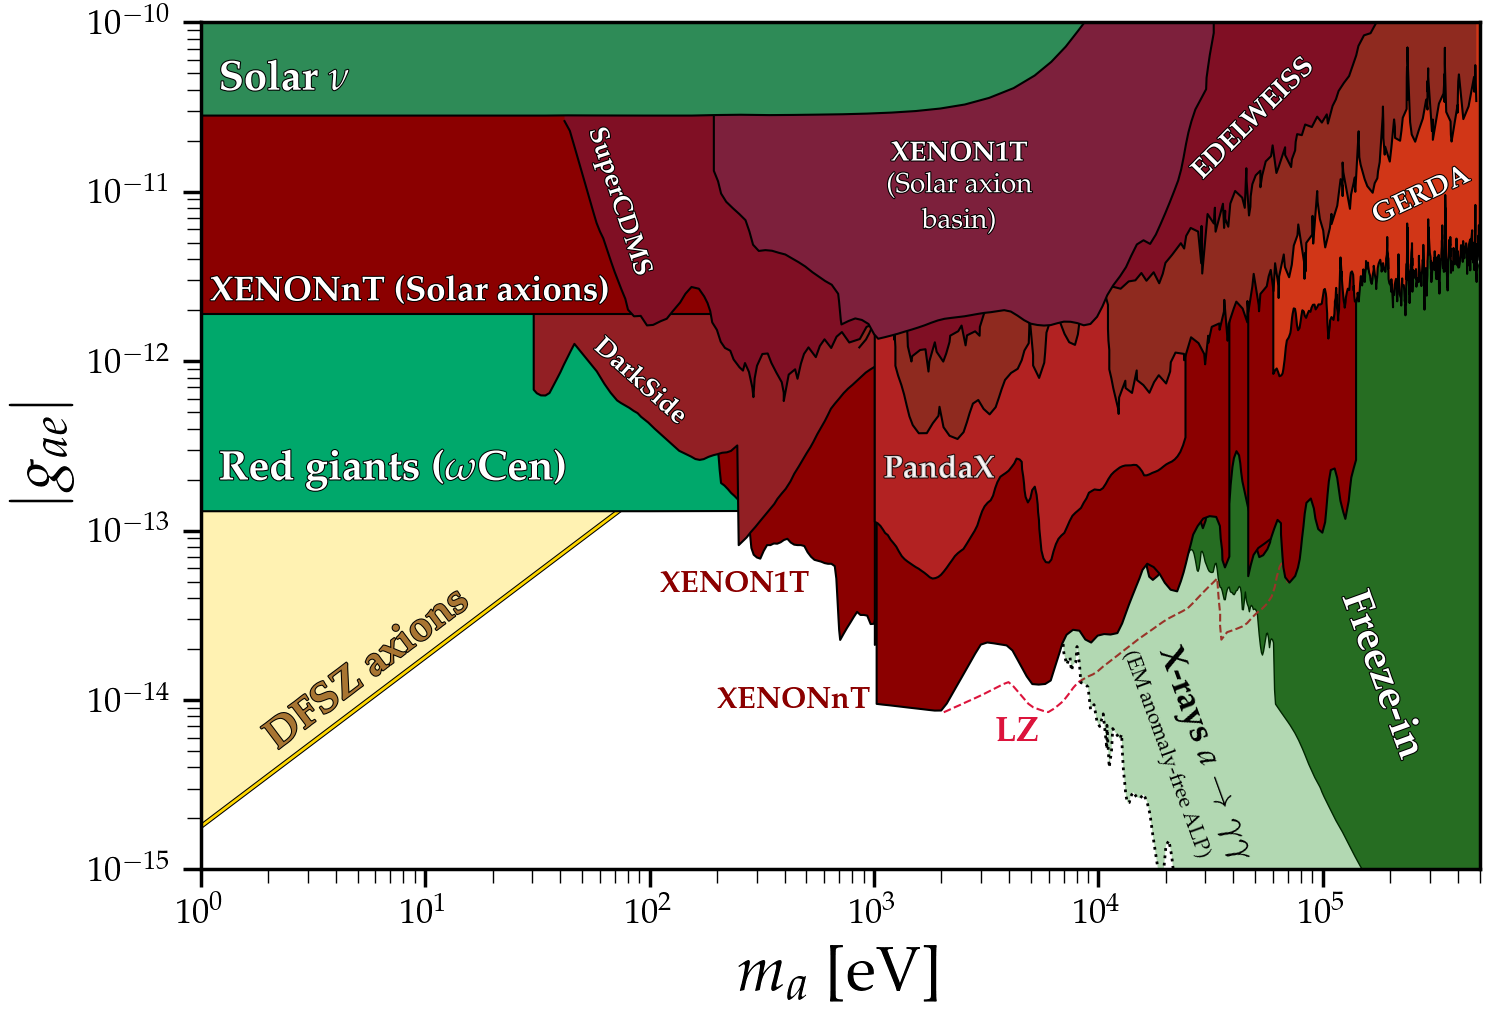

In [3]:
from PlotFuncs import line_background

fig,ax = FigSetup(Shape='Rectangular',ylab=r'$|g_{ae}|$',mathpazo=True,\
                  g_min=1e-15,g_max=1e-10,m_min=1e0,m_max=5e5,xtick_rotation=0,tfs=25)


AxionElectron.QCDAxion(ax,DFSZ_on=True,KSVZ_on=False,Hadronic_on=False)

plt.gcf().text(0.16,0.22,r'{\bf DFSZ axions}',fontsize=30,rotation=37,alpha=1,color='#a87532',path_effects=line_background(1.5,'k'))

AxionElectron.XENONnT_Solar(ax,label=r'{\bf XENONnT}',fs=25,text_shift=[5.5e8,0.8],lw=1.5)
AxionElectron.PandaX(ax,fs=25,text_pos=[1.1e3,2.8e-13],rotation=0,alpha=0.8,rotation_mode='anchor',lw=1.5)
AxionElectron.XENON1T(ax,text_shift=[2,1.45],fs=22,lw=1.5)
AxionElectron.XENONnT(ax,text_shift=[0.55,1.45],fs=22,lw=1.5)
AxionElectron.SolarBasin(ax,lw=1.5)
AxionElectron.SuperCDMS(ax,text_pos=[5e1,2.5e-11],rotation=-72,lw=1.5)
AxionElectron.DarkSide(ax,text_pos=[5.3e1,1.45e-12],rotation=-42,lw=1.5,zorder=0.51)
AxionElectron.EDELWEISS(ax,text_pos=[2.5e4,1.2e-11],fs=20,rotation=45,text_col='w',lw=1.5)
AxionElectron.RedGiants(ax,text_pos=[1.2e0,2e-13],lw=1.5)
AxionElectron.SolarNu(ax,text_pos=[1.2e0,4e-11],lw=1.5)
AxionElectron.GERDA(ax,fs=20,text_pos=[1.6e5,1.5e-11],rotation=25,lw=1.5)
AxionElectron.LZ(ax,fs=25,text_pos=[3.5e3,0.8e-14],rotation=0,rotation_mode='anchor',lw=1.5)

AxionElectron.Xrays(ax,text_on=False,lw=1.5)
plt.text(3e4,1.2e-15,r'{\bf X-rays} $a\rightarrow \gamma\gamma$',fontsize=25,color='k',ha='center',rotation=-70)
plt.text(2e4,1.2e-15,r'(EM anomaly-free ALP)',fontsize=15,color='k',ha='center',rotation=-70)


AxionElectron.IrreducibleFreezeIn(ax,text_pos=[3e5,0.5e-14],rotation=-70,fs=30)


MySaveFig(fig,'AxionElectron_UndergroundDetectorsCloseup')

